In [1]:
product = None
upstream = None
md_reference_data = None

In [2]:
# Parameters
code_palette = {
    "6ftl": "#5e93f5",
    "3zxw": "#976cd2",
    "8ruc": "#976cd2",
    "1bwv": "#75eda7",
    "6ura": "#91da48",
    "anciip": "gray",
    "anci": "gray",
    "anciab": "gray",
    "ancicd": "gray",
    "ancia": "gray",
    "ancib": "gray",
    "ancip": "gray",
}
md_reference_data = [
    {
        "code": "1bwv",
        "dry_dcd": "1bwv.exp02.md01.dry.dcd",
        "dry_pdb": "1bwv.exp02.md01.dry.pdb",
        "time": "extant",
        "gas": "CO2",
        "concentration": "400mM",
    },
    {
        "code": "1bwv",
        "dry_dcd": "1bwv.exp04.md01.dry.dcd",
        "dry_pdb": "1bwv.exp04.md01.dry.pdb",
        "time": "extant",
        "gas": "MO2",
        "concentration": "400mM",
    },
    {
        "code": "3zxw",
        "dry_dcd": "3zxw.exp02.md01.dry.dcd",
        "dry_pdb": "3zxw.exp02.md01.dry.pdb",
        "time": "extant",
        "gas": "CO2",
        "concentration": "400mM",
    },
    {
        "code": "3zxw",
        "dry_dcd": "3zxw.exp04.md01.dry.dcd",
        "dry_pdb": "3zxw.exp04.md01.dry.pdb",
        "time": "extant",
        "gas": "MO2",
        "concentration": "400mM",
    },
    {
        "code": "6ftl",
        "dry_dcd": "6ftl.exp02.md01.dry.dcd",
        "dry_pdb": "6ftl.exp02.md01.dry.pdb",
        "time": "extant",
        "gas": "CO2",
        "concentration": "400mM",
    },
    {
        "code": "6ftl",
        "dry_dcd": "6ftl.exp04.md01.dry.dcd",
        "dry_pdb": "6ftl.exp04.md01.dry.pdb",
        "time": "extant",
        "gas": "MO2",
        "concentration": "400mM",
    },
    {
        "code": "8ruc",
        "dry_dcd": "8ruc.exp02.md01.dry.dcd",
        "dry_pdb": "8ruc.exp02.md01.dry.pdb",
        "time": "extant",
        "gas": "CO2",
        "concentration": "400mM",
    },
    {
        "code": "8ruc",
        "dry_dcd": "8ruc.exp04.md01.dry.dcd",
        "dry_pdb": "8ruc.exp04.md01.dry.pdb",
        "time": "extant",
        "gas": "MO2",
        "concentration": "400mM",
    },
    {
        "code": "anci",
        "dry_dcd": "anci.exp02.md01.dry.dcd",
        "dry_pdb": "anci.exp02.md01.dry.pdb",
        "time": "ancient",
        "gas": "CO2",
        "concentration": "400mM",
    },
    {
        "code": "anci",
        "dry_dcd": "anci.exp04.md01.dry.dcd",
        "dry_pdb": "anci.exp04.md01.dry.pdb",
        "time": "ancient",
        "gas": "MO2",
        "concentration": "400mM",
    },
    {
        "code": "ancia",
        "dry_dcd": "ancia.exp02.md01.dry.dcd",
        "dry_pdb": "ancia.exp02.md01.dry.pdb",
        "time": "ancient",
        "gas": "CO2",
        "concentration": "400mM",
    },
    {
        "code": "ancia",
        "dry_dcd": "ancia.exp04.md01.dry.dcd",
        "dry_pdb": "ancia.exp04.md01.dry.pdb",
        "time": "ancient",
        "gas": "MO2",
        "concentration": "400mM",
    },
    {
        "code": "ancib",
        "dry_dcd": "ancib.exp02.md01.dry.dcd",
        "dry_pdb": "ancib.exp02.md01.dry.pdb",
        "time": "ancient",
        "gas": "CO2",
        "concentration": "400mM",
    },
    {
        "code": "ancib",
        "dry_dcd": "ancib.exp04.md01.dry.dcd",
        "dry_pdb": "ancib.exp04.md01.dry.pdb",
        "time": "ancient",
        "gas": "MO2",
        "concentration": "400mM",
    },
    {
        "code": "ancicd",
        "dry_dcd": "ancicd.exp02.md01.dry.dcd",
        "dry_pdb": "ancicd.exp02.md01.dry.pdb",
        "time": "ancient",
        "gas": "CO2",
        "concentration": "400mM",
    },
    {
        "code": "ancicd",
        "dry_dcd": "ancicd.exp04.md01.dry.dcd",
        "dry_pdb": "ancicd.exp04.md01.dry.pdb",
        "time": "ancient",
        "gas": "MO2",
        "concentration": "400mM",
    },
    {
        "code": "anciab",
        "dry_dcd": "anciab.exp02.md01.dry.dcd",
        "dry_pdb": "anciab.exp02.md01.dry.pdb",
        "time": "ancient",
        "gas": "CO2",
        "concentration": "400mM",
    },
    {
        "code": "anciab",
        "dry_dcd": "anciab.exp04.md01.dry.dcd",
        "dry_pdb": "anciab.exp04.md01.dry.pdb",
        "time": "ancient",
        "gas": "MO2",
        "concentration": "400mM",
    },
]
product = {
    "nb": "/mnt/researchdrive/bCuevas/r23/github_repo/RuBisCO_evolution/analysis/output/out-05-R23-gas-contacts.ipynb",
    "contacts_per_subunit": "/mnt/researchdrive/bCuevas/r23/github_repo/RuBisCO_evolution/analysis/output/contacts.csv",
}


# Contact analysis for Rubisco Extant protein complexes

In [3]:
import MDAnalysis as mda
#from MDAnalysis.tests.datafiles import TPR, XTC
from MDAnalysis.analysis import density
from MDAnalysis.analysis import rdf
from MDAnalysis.analysis import contacts
import prody as pdy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
import math

/home/kaustubh/miniconda3/envs/md-analysis/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [4]:
def contacts_within_cutoff(u, group_a, group_b, radius=6.0):
    timeseries = []
    for ts in u.trajectory:
        dist = contacts.distance_array(group_a.positions, group_b.positions)
        n_contacts = contacts.contact_matrix(dist, radius).sum()
        timeseries.append([ts.frame, n_contacts])
    return np.array(timeseries)

In [5]:
lsu_chains = ['A','E','I','M','C','G','K','O']
ssu_chains = ['B','F','J','N','D','H','L','P']

In [6]:
def average_gas_per_subunit(pdb_file, dcd_file, gas, atom, conc):
    env = mda.Universe(pdb_file, dcd_file, frames="all")
    prot_lsu_atoms = env.select_atoms('protein').select_atoms('name CA and (segid A or segid E or segid I or segid M or segid C or segid G or segid K or segid O)')     # This is the annotation for 8RUC reference structure we have
    prot_ssu_atoms = env.select_atoms('protein').select_atoms('name CA and (segid B or segid F or segid J or segid N or segid D or segid H or segid L or segid P)')
    gas_atoms = env.select_atoms('resname ' + gas).select_atoms('name ' + atom)

    ca_lsu = contacts_within_cutoff(env, gas_atoms, prot_lsu_atoms, radius=6.0)
    ca_lsu_df = pd.DataFrame(ca_lsu, columns=['Frame', '# Contacts'])

    ca_ssu = contacts_within_cutoff(env, gas_atoms, prot_ssu_atoms, radius=6.0)
    ca_ssu_df = pd.DataFrame(ca_ssu, columns=['Frame', '# Contacts'])

    avg_val_lsu = sum(ca_lsu_df['# Contacts'][249:749])/len(prot_lsu_atoms)
    avg_val_ssu = sum(ca_ssu_df['# Contacts'][249:749])/len(prot_ssu_atoms)

    return(avg_val_lsu, avg_val_ssu)

In [7]:
def average_gas_per_individual_subunit(pdb_file, dcd_file, gas, atom, conc):
    
    env = mda.Universe(pdb_file, dcd_file, frames="all")
    gas_atoms = env.select_atoms('resname ' + gas).select_atoms('name ' + atom)

    li_ca_lsu = []
    for id in lsu_chains:
        prot_lsu_atoms = env.select_atoms('protein').select_atoms('name CA and segid ' + id)
        ca_lsu = contacts_within_cutoff(env, gas_atoms, prot_lsu_atoms, radius=6.0)
        ca_lsu_df = pd.DataFrame(ca_lsu, columns=['Frame', '# Contacts'])
        avg_val_lsu = sum(ca_lsu_df['# Contacts'][249:749])/len(prot_lsu_atoms)
        li_ca_lsu.append(avg_val_lsu)
        
    li_ca_ssu = []
    for id in ssu_chains:
        prot_ssu_atoms = env.select_atoms('protein').select_atoms('name CA and segid ' + id)
        ca_ssu = contacts_within_cutoff(env, gas_atoms, prot_ssu_atoms, radius=6.0)
        ca_ssu_df = pd.DataFrame(ca_ssu, columns=['Frame', '# Contacts'])
        try:
            avg_val_ssu = sum(ca_ssu_df['# Contacts'][249:749])/len(prot_ssu_atoms)
        except ZeroDivisionError:
            avg_val_ssu = 0
        li_ca_ssu.append(avg_val_ssu)

    return(li_ca_lsu, li_ca_ssu)

In [8]:
avergage_gas_per_indvidual_subunit_contacts = []
path = '../../../simulations/'

def central_atom(gas):
    if gas == 'CO2':
        return 'C1'
    elif gas == 'MO2':
        return 'O1'

for entry in md_reference_data:
    print(entry['code'])

    contacts_lsu, contacts_ssu = average_gas_per_individual_subunit(
        path + entry['dry_pdb'], 
        path + entry['dry_dcd'], 
        entry['gas'], 
        central_atom(entry['gas']), 
        entry['concentration']
    )
    for x in contacts_lsu:
    
        avergage_gas_per_indvidual_subunit_contacts.append(
            dict(
                code=entry['code'], gas=entry['gas'],
                concentration=entry['concentration'],
                contacts=x, subunit='lsu'
            )
        )
    
    for x in contacts_ssu:
    
        avergage_gas_per_indvidual_subunit_contacts.append(
            dict(
                code=entry['code'], gas=entry['gas'],
                concentration=entry['concentration'],
                contacts=x, subunit='ssu'
            )
        )

avergage_gas_per_indvidual_subunit_contacts = pd.DataFrame.from_records(
    avergage_gas_per_indvidual_subunit_contacts
)

1bwv


/home/kaustubh/miniconda3/envs/md-analysis/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


1bwv


/home/kaustubh/miniconda3/envs/md-analysis/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


3zxw


/home/kaustubh/miniconda3/envs/md-analysis/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


3zxw


/home/kaustubh/miniconda3/envs/md-analysis/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


6ftl


/home/kaustubh/miniconda3/envs/md-analysis/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


6ftl


/home/kaustubh/miniconda3/envs/md-analysis/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


8ruc


/home/kaustubh/miniconda3/envs/md-analysis/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


8ruc


/home/kaustubh/miniconda3/envs/md-analysis/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


anci


/home/kaustubh/miniconda3/envs/md-analysis/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


anci


/home/kaustubh/miniconda3/envs/md-analysis/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


ancia


/home/kaustubh/miniconda3/envs/md-analysis/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


ancia


/home/kaustubh/miniconda3/envs/md-analysis/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


ancib


/home/kaustubh/miniconda3/envs/md-analysis/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


ancib


/home/kaustubh/miniconda3/envs/md-analysis/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


ancicd


/home/kaustubh/miniconda3/envs/md-analysis/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


ancicd


/home/kaustubh/miniconda3/envs/md-analysis/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


anciab


/home/kaustubh/miniconda3/envs/md-analysis/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


anciab


/home/kaustubh/miniconda3/envs/md-analysis/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


(0.0, 250.0)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


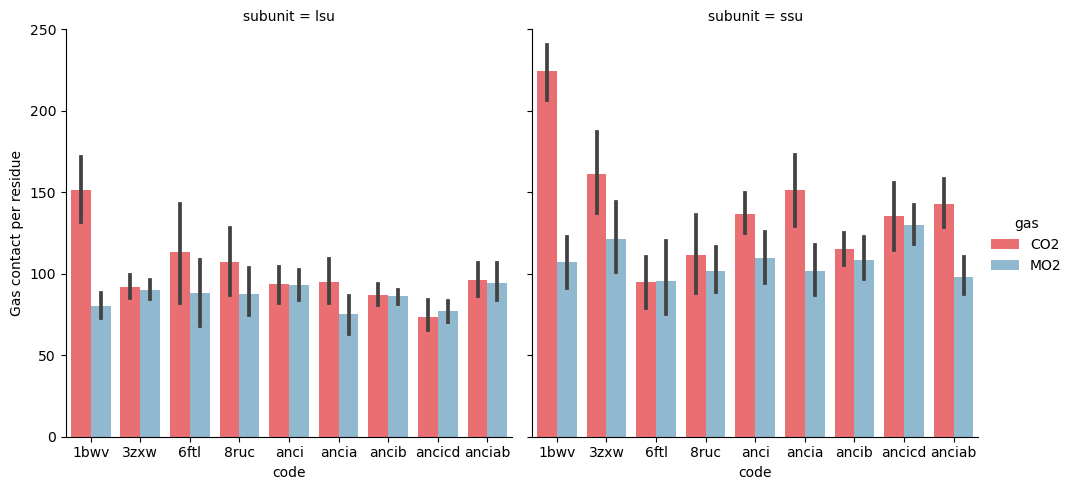

In [9]:
col_set = {"CO2" : "#ff5a5f",  "MO2" : "#86bbd8"}
g = sns.catplot(
    data=avergage_gas_per_indvidual_subunit_contacts, 
    x='code', y='contacts', hue='gas', col='subunit',
    palette=col_set, kind='bar'
)
g.set_ylabels('Gas contact per residue', fontname='Arial')
g.axes[0, 0].set_ylim(0,250)
g.axes[0, 1].set_ylim(0,250)

In [10]:
avergage_gas_per_indvidual_subunit_contacts.to_csv(
    product['contacts_per_subunit'], index=None
)

# Calclulating Statiscs for comparing the gas contacts
## Student t-test

In [11]:
from scipy.stats import ttest_ind

In [12]:
u = avergage_gas_per_indvidual_subunit_contacts.groupby(['code', 'subunit', 'gas']).apply(lambda x: list(x['contacts'])).reset_index().rename(columns={0:'contacts'}).pivot(
    index=['code', 'subunit'], columns='gas', values='contacts'
)
# t_stat = ttest_ind(cc[cc.code.isin([var])]['value']
u['t_test_pvalue'] = u.apply(
    lambda x: ttest_ind(x['CO2'], x['MO2']).pvalue, axis=1
)
u
u['t_test_statistic'] = u.apply(
    lambda x: ttest_ind(x['CO2'], x['MO2']).statistic, axis=1
)

u['CO2_mean'] = u['CO2'].apply(np.mean)
u['MO2_mean'] = u['MO2'].apply(np.mean)
u['CO2_std'] = u['CO2'].apply(np.std)
u['MO2_std'] = u['MO2'].apply(np.std)

u.reset_index()[['code', 'subunit', 't_test_pvalue', 't_test_statistic', 'CO2_mean', 'MO2_mean', 'CO2_std', 'MO2_std']]

gas,code,subunit,t_test_pvalue,t_test_statistic,CO2_mean,MO2_mean,CO2_std,MO2_std
0,1bwv,lsu,3.743741e-05,5.918860,151.195860,80.341561,29.638804,11.165331
1,1bwv,ssu,4.911744e-07,8.726068,224.338768,107.461957,26.707048,23.292168
2,3zxw,lsu,7.057424e-01,0.385388,92.095302,90.169546,10.176548,8.439385
3,3zxw,ssu,4.354644e-02,2.218684,161.247312,121.448925,35.651384,31.326362
4,6ftl,lsu,2.252889e-01,1.268552,113.438990,88.359895,43.265987,29.393619
5,6ftl,ssu,9.456860e-01,-0.069357,94.805955,95.856404,22.333092,33.270436
6,8ruc,lsu,1.921438e-01,1.370376,107.193222,87.545939,31.058771,21.776803
7,8ruc,ssu,5.372848e-01,0.632452,111.565130,101.808040,35.006969,20.989200
8,anci,lsu,9.137338e-01,0.110304,93.750801,92.862714,16.104403,13.943023
9,anci,ssu,2.538669e-02,2.501628,136.598039,109.665441,18.353668,21.782893
